# Compute scattering coefficients

Edited by Louise, 28-02-2023

We show how to compute scattering coefficients. Starting with axisymmetric wavelets.


In [1]:
import s2wav.utils.shapes
from jax import jit, config
config.update("jax_enable_x64", True)

import numpy as np
import jax.numpy as jnp
import healpy as hp
from matplotlib import pyplot as plt
from importlib import reload

from PIL import Image
from matplotlib.image import pil_to_array

import scatcovjax.Sphere_lib as sphlib
import scatcovjax.Scattering_lib as scatlib
from s2wav.filter_factory.filters import filters_directional_vectorised

import s2fft
import s2wav

import scatcovjax.plotting as plot



In [2]:
reload(plot)
plot.notebook_plot_format()

# Parameters
N = 3 is 5 orientations (2*N-1)

In [3]:
sampling = "mw"
L = 16
multiresolution = True
reality = False
N = 2
J_min = 0
nside = L/2

J_max = s2wav.utils.shapes.j_max(L)
J = J_max - J_min + 1
print(J)

4 4


# Make a data map

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


(16, 31)
Target = Planet map (Ntheta, Nphi)= (16, 31)
Ilm (16, 31)


Text(0.5, 0, 'l indices')

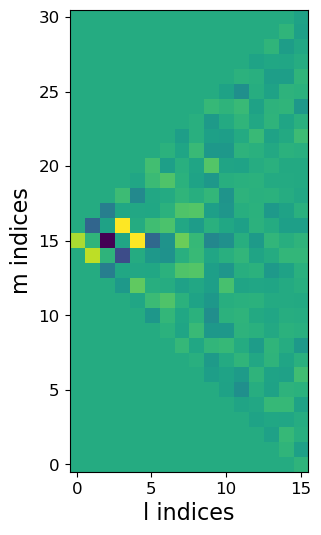

In [4]:
reload(sphlib)
# Random noise
# np.random.seed(2)
# I = np.random.randn(L, 2 * L - 1).astype(np.float64)
# I = np.random.randn(L, 2 * L - 1).astype(np.float64) + 1j*np.random.randn(L, 2 * L - 1).astype(np.float64)
# Ilm = s2fft.forward_jax(I, L, sampling=sampling, nside=nside)


### LSS
#I, Ilm = sphlib.make_MW_lensing(L, normalize=True, reality=reality)
#print('Target = LSS map')

### PySM
# I, Ilm = sphlib.make_pysm_sky(L, 'cmb', sampling=sampling, nest=False, normalize=True, reality=reality)
# print('Target = CMB map')

### Planet image
I, Ilm = sphlib.make_planet(L, 'venus', normalize=True, reality=reality)
print('Target = Planet map', '(Ntheta, Nphi)=', I.shape)
print('Ilm', Ilm.shape)


# Plot the map
# plt.figure(figsize=(8, 6))
# plt.imshow(I)
# hp.mollview(I)

plt.figure(figsize=(8, 6))
plt.imshow(np.real(Ilm.T), origin='lower')
plt.ylabel('m indices')
plt.xlabel('l indices')


# Build the wavelets

In [5]:
filters = filters_directional_vectorised(L, N, J_min)
plot.plot_filters(filters, real=False, m=L-2)


filters = filters[0]
print(filters.shape)

# Compute the scattering coefficients

In [81]:
reload(scatlib)
mean, var, S1, P00, C01, C11 = scatlib.scat_cov_dir(
    Ilm, L, N, J_min, sampling, nside, reality, multiresolution, filters=filters)


 j=1
2

 j=2
3

 j=3
4

 j=4
4


# Plot S1 et P00

In [9]:
S1 = np.reshape(S1, [J, 2*N-1])
P00 = np.reshape(P00, [J, 2*N-1])


Lj 4
Lj 8
Lj 16
Lj 16
quad 4 (4,) (8,)
precomps 4 5 (3, 2, 4, 3) (1, 4, 3)
W 4 (3, 4, 7) (3, 16, 31)

 j2=1
Lj2=4
P00 1st way Traced<ShapedArray(complex128[3])>with<DynamicJaxprTrace(level=1/0)>
P00 2nd way Traced<ShapedArray(float64[3])>with<DynamicJaxprTrace(level=1/0)>
val 2 (3, 4, 7)
val 2 (3, 4, 7)
val 2 (3, 4, 7)
Njjprime_for_j 3 2 (3, 4, 7)

 j2=2
Lj2=8
P00 1st way Traced<ShapedArray(complex128[3])>with<DynamicJaxprTrace(level=1/0)>
P00 2nd way Traced<ShapedArray(float64[3])>with<DynamicJaxprTrace(level=1/0)>
val 3 (3, 8, 15)
val 3 (3, 8, 15)
val 3 (3, 8, 15)
Njjprime_for_j 3 3 (3, 4, 7)

 j2=3
Lj2=16
P00 1st way Traced<ShapedArray(complex128[3])>with<DynamicJaxprTrace(level=1/0)>
P00 2nd way Traced<ShapedArray(float64[3])>with<DynamicJaxprTrace(level=1/0)>
val 4 (3, 16, 31)
val 4 (3, 16, 31)
val 4 (3, 16, 31)
Njjprime_for_j 3 4 (3, 4, 7)

 j2=4
Lj2=16
P00 1st way Traced<ShapedArray(complex128[3])>with<DynamicJaxprTrace(level=1/0)>
P00 2nd way Traced<ShapedArray(float64[3])>with

In [20]:
def plot_S1_P00(coeff, ylabel, figsize=(12,6)):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=figsize)

    for j in range(J):
        ax0.plot(coeff[j, :], label=f'{j=}')
    ax0.set_xlabel('n')
    ax0.set_ylabel(ylabel)
    ax0.legend()

    for n in range(2*N-1):
        ax1.plot(coeff[:, n], label=f'{n=}')
    ax1.set_xlabel('j')
    ax1.set_ylabel(ylabel)
    ax1.legend()

    fig.tight_layout()
    return fig


Lj 4
Lj 8
Lj 16
Lj 16
quad 4 (4,) (8,)
precomps 4 5 (3, 2, 4, 3) (1, 4, 3)
W 4 (3, 4, 7) (3, 16, 31)

 j2=1
Lj2=4
P00 1st way Traced<ShapedArray(complex128[3])>with<DynamicJaxprTrace(level=1/0)>
P00 2nd way Traced<ShapedArray(float64[3])>with<DynamicJaxprTrace(level=1/0)>
val 2 (3, 4, 7)
val 2 (3, 4, 7)
val 2 (3, 4, 7)
Njjprime_for_j 3 2 (3, 4, 7)

 j2=2
Lj2=8
P00 1st way Traced<ShapedArray(complex128[3])>with<DynamicJaxprTrace(level=1/0)>
P00 2nd way Traced<ShapedArray(float64[3])>with<DynamicJaxprTrace(level=1/0)>
val 3 (3, 8, 15)
val 3 (3, 8, 15)
val 3 (3, 8, 15)
Njjprime_for_j 3 3 (3, 4, 7)

 j2=3
Lj2=16
P00 1st way Traced<ShapedArray(complex128[3])>with<DynamicJaxprTrace(level=1/0)>
P00 2nd way Traced<ShapedArray(float64[3])>with<DynamicJaxprTrace(level=1/0)>
val 4 (3, 16, 31)
val 4 (3, 16, 31)
val 4 (3, 16, 31)
Njjprime_for_j 3 4 (3, 4, 7)

 j2=4
Lj2=16
P00 1st way Traced<ShapedArray(complex128[3])>with<DynamicJaxprTrace(level=1/0)>
P00 2nd way Traced<ShapedArray(float64[3])>with

In [24]:
fig = plot_S1_P00(S1, ylabel='S1')

[Array([0.03825529, 0.08043877, 0.06610467], dtype=float64),
 Array([0.03929245, 0.06798872, 0.07537891], dtype=float64),
 Array([0.03485224, 0.05167461, 0.05546627], dtype=float64),
 Array([0.01863221, 0.01892425, 0.01667803], dtype=float64)]

In [25]:
fig = plot_S1_P00(P00, ylabel='P00')

Lj 4
Lj 8
Lj 16
Lj 16
quad 4 (4,) (8,)
precomps 4 5 (3, 2, 4, 3) (1, 4, 3)
W 4 (3, 4, 7) (3, 16, 31)

 j2=1
Lj2=4
P00 1st way Traced<ShapedArray(complex128[3])>with<DynamicJaxprTrace(level=1/0)>
P00 2nd way Traced<ShapedArray(float64[3])>with<DynamicJaxprTrace(level=1/0)>
val 2 (3, 4, 7)
val 2 (3, 4, 7)
val 2 (3, 4, 7)
Njjprime_for_j 3 2 (3, 4, 7)

 j2=2
Lj2=8
P00 1st way Traced<ShapedArray(complex128[3])>with<DynamicJaxprTrace(level=1/0)>
P00 2nd way Traced<ShapedArray(float64[3])>with<DynamicJaxprTrace(level=1/0)>
val 3 (3, 8, 15)
val 3 (3, 8, 15)
val 3 (3, 8, 15)
Njjprime_for_j 3 3 (3, 4, 7)

 j2=3
Lj2=16
P00 1st way Traced<ShapedArray(complex128[3])>with<DynamicJaxprTrace(level=1/0)>
P00 2nd way Traced<ShapedArray(float64[3])>with<DynamicJaxprTrace(level=1/0)>
val 4 (3, 16, 31)
val 4 (3, 16, 31)
val 4 (3, 16, 31)
Njjprime_for_j 3 4 (3, 4, 7)

 j2=4
Lj2=16
P00 1st way Traced<ShapedArray(complex128[3])>with<DynamicJaxprTrace(level=1/0)>
P00 2nd way Traced<ShapedArray(float64[3])>with

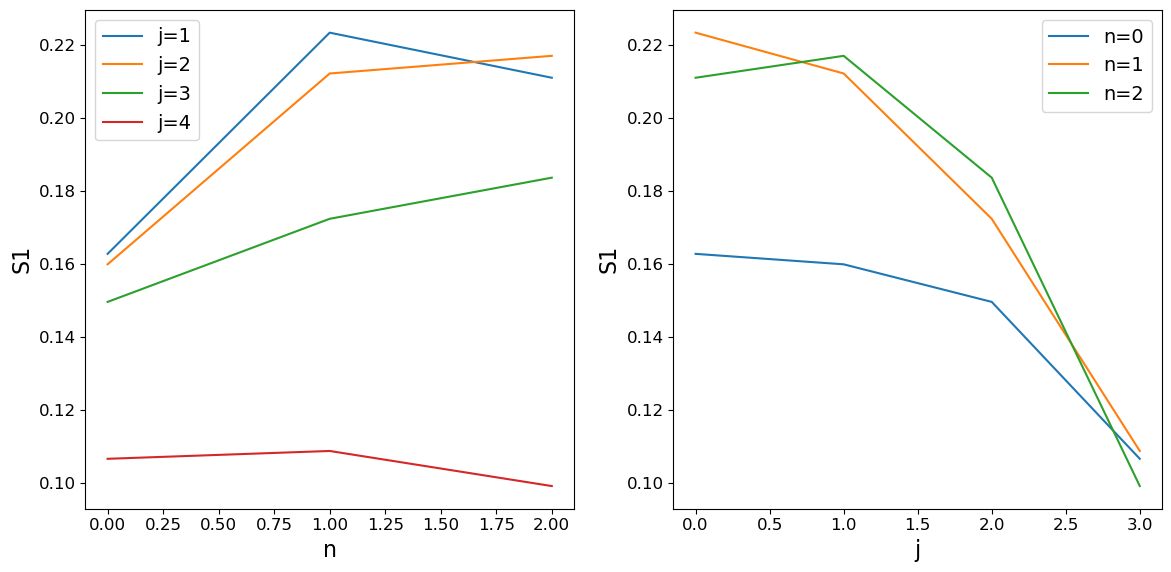

# Plot C01

In [27]:
print(len(C01))
print(C01)

plt.figure()
for j1 in range(J-1):
    j1_value = 4-j1
    # Determine the j3 values
    nj3 = C01[j1].shape[0]
    print(j1, nj3)
    allj3 = np.arange(nj3)
    for n3 in range(2*N-1):
        for n1 in range(1):

            plt.plot(j1_value - allj3, C01[j1][:, n3, n1])
    print(j1)
    print(C01[j1].shape)

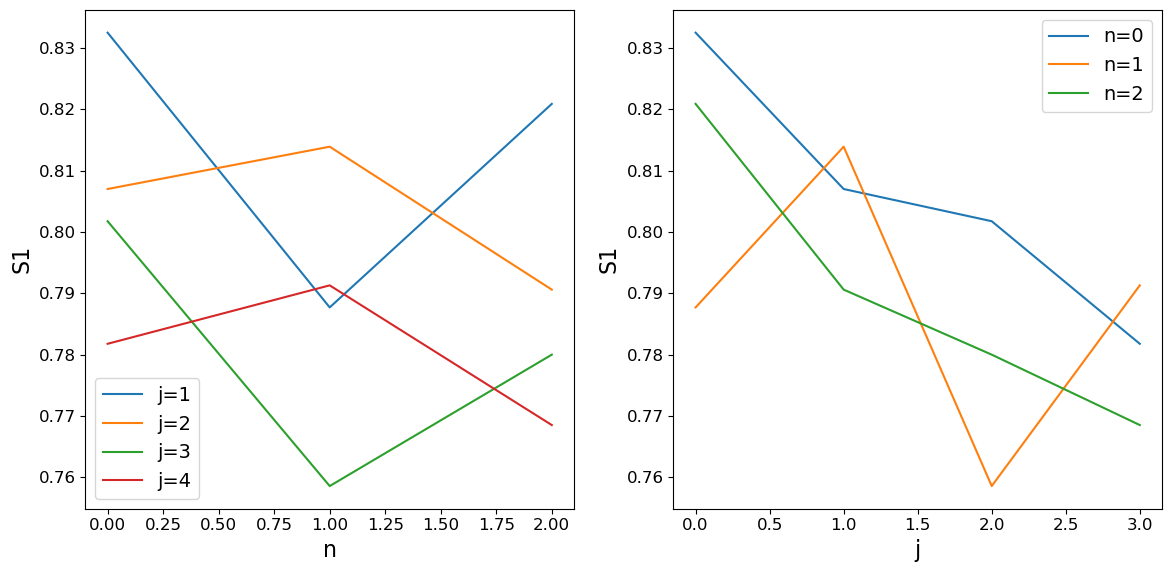

In [28]:
def select_C01(idxC01, j1, j2, n1, n2):
    
    idx = np.where((idxC01[0, :] == j1) & 
                   (idxC01[1, :] == j2) & 
                   (idxC01[2, :] == n1) & 
                   (idxC01[3, :] == n2))[0]
    return idx

j1 = 2

colorlist = ['b', 'g', 'r', 'orange', 'm']
plt.figure()
for j2 in range(J_min, j1+1):
    for n1 in range(2*N-1):
        for n2 in range(1):
            idx = select_C01(idxC01, j1=j1, j2=j2, n1=n1, n2=n2)

            color = colorlist[n1]
            plt.plot((idxC01[0, :] - idxC01[1, :])[idx], np.real(C01[idx]), 'o', color=color, label=f'{n1=}, {n2=}')
plt.xlabel('j1 - j2')
plt.ylabel('C01')
#plt.legend()

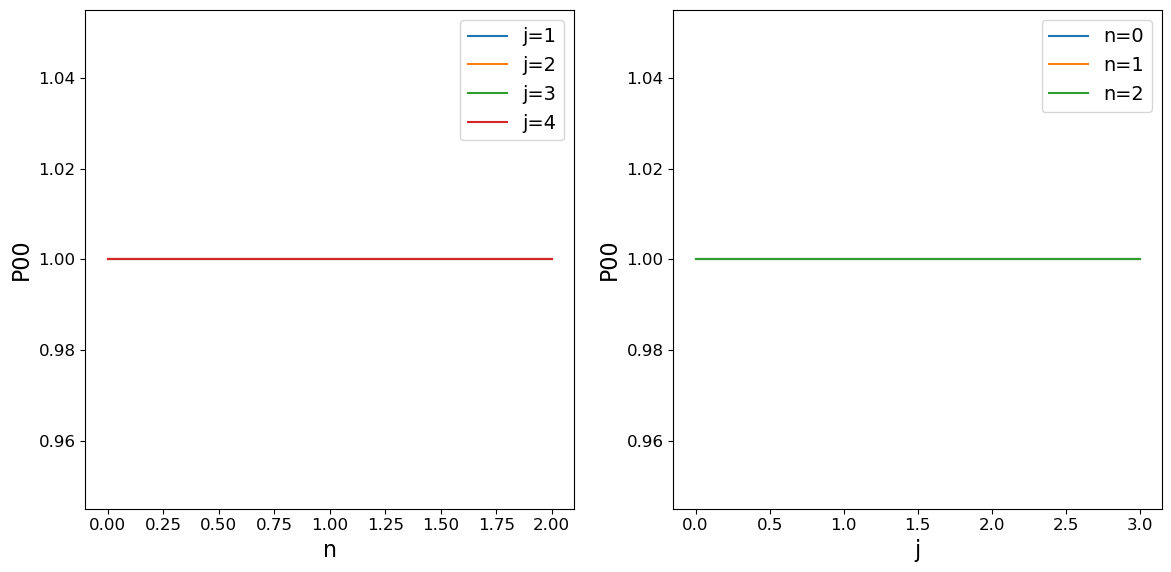

In [29]:
def select_C11(idxC11, j1, j2, j3, n1, n2, n3):
    
    idx = np.where((idxC11[0, :] == j1) & 
                   (idxC11[1, :] == j2) & 
                   (idxC11[2, :] == j3) &
                   (idxC11[3, :] == n1) & 
                   (idxC11[4, :] == n2) &
                   (idxC11[5, :] == n3))[0]
    return idx

0 [1 2 3 4]
1 [2 3 4]
2 [3 4]
3 [4]


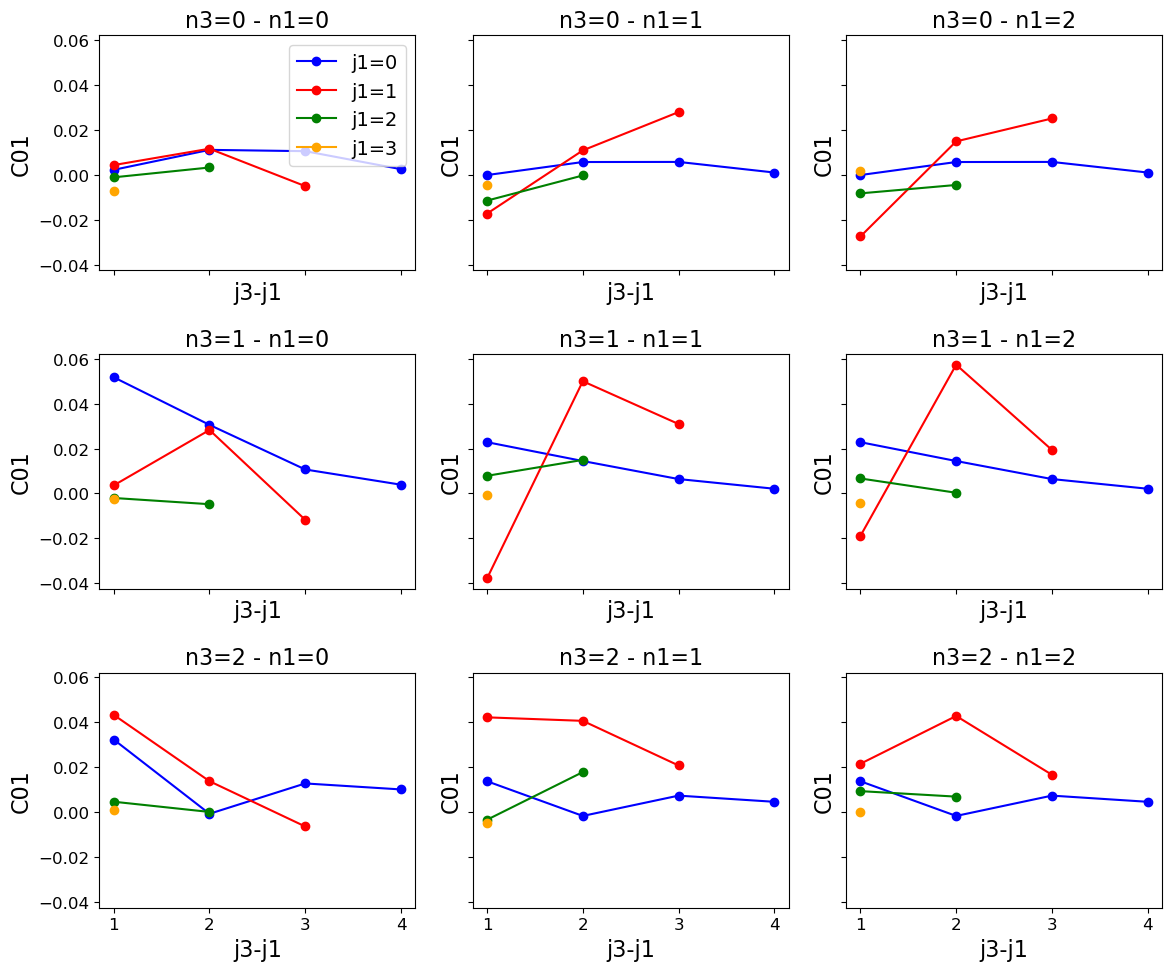

In [120]:
# Average over orientations
avgS1 = np.average(S1.reshape(-1, 2*N-1), axis=1)
avgP00 = np.average(P00.reshape(-1, 2*N-1), axis=1)

In [30]:
plot.plot_scatcov_coeffs(np.log2(avgS1), 
                         np.log2(avgP00), 
                         C01, 
                         C11, name='Avg', hold=True, color='k', ls='-')

colorlist = ['b', 'g', 'r', 'orange', 'm']
for n in range(2*N-1):
    # Select one orientation
    S1_one_orient = S1[np.where(idxS1_P00[1, :] == n)[0]]
    P00_one_orient = P00[np.where(idxS1_P00[1, :] == n)[0]]
    
    plot.plot_scatcov_coeffs(np.log2(S1_one_orient), 
                             np.log2(P00_one_orient), 
                             C01, 
                             C11, name=f'{n=}', hold=False, color=colorlist[n], ls='', marker='o')

3
(3, 3, 3)
(2, 3, 3)
(1, 3, 3)


1 [2 3 4]
2 [3 4]
3 [4]


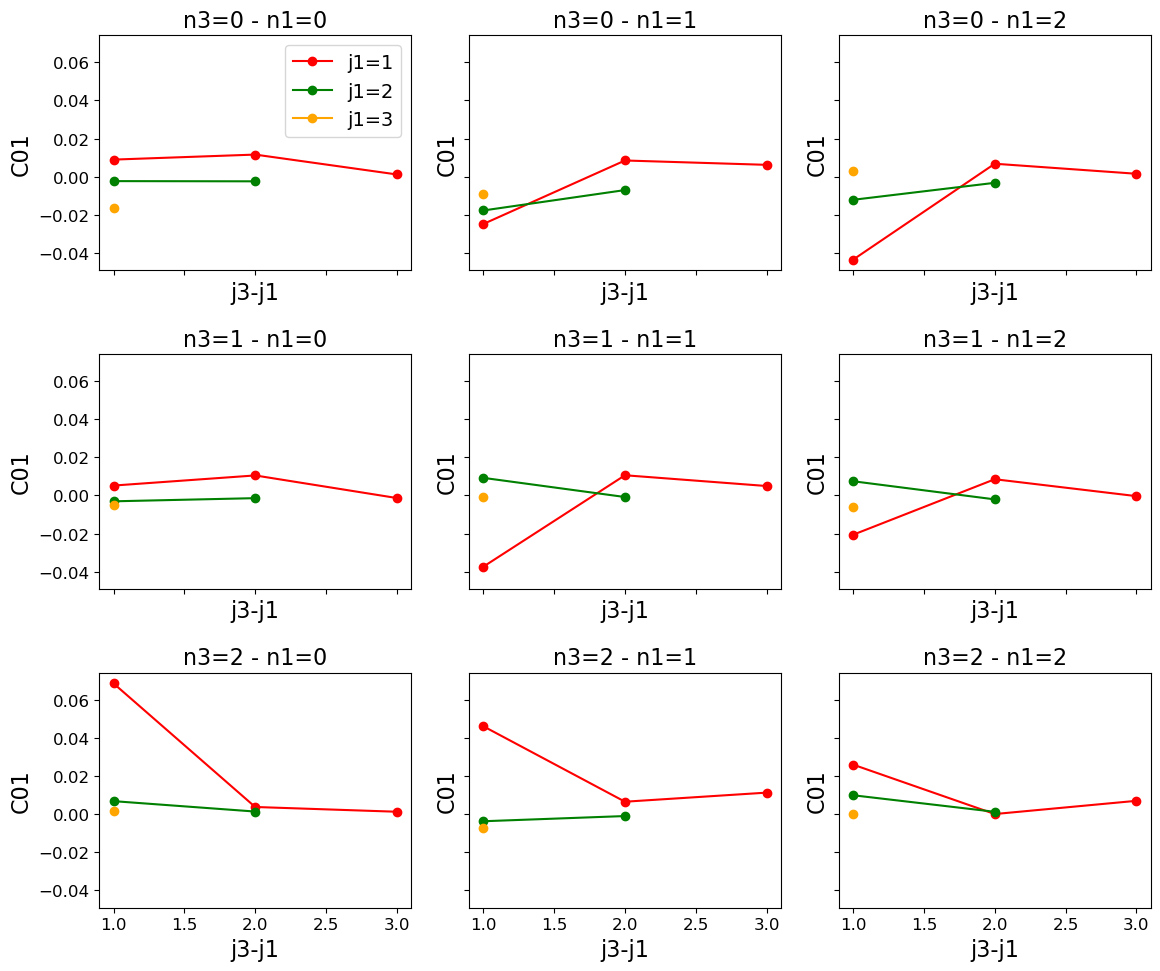

In [31]:
print(C01)

0 [1 2 3 4] 1
1 [2 3 4] 2
2 [3 4] 3
3 [4] 4


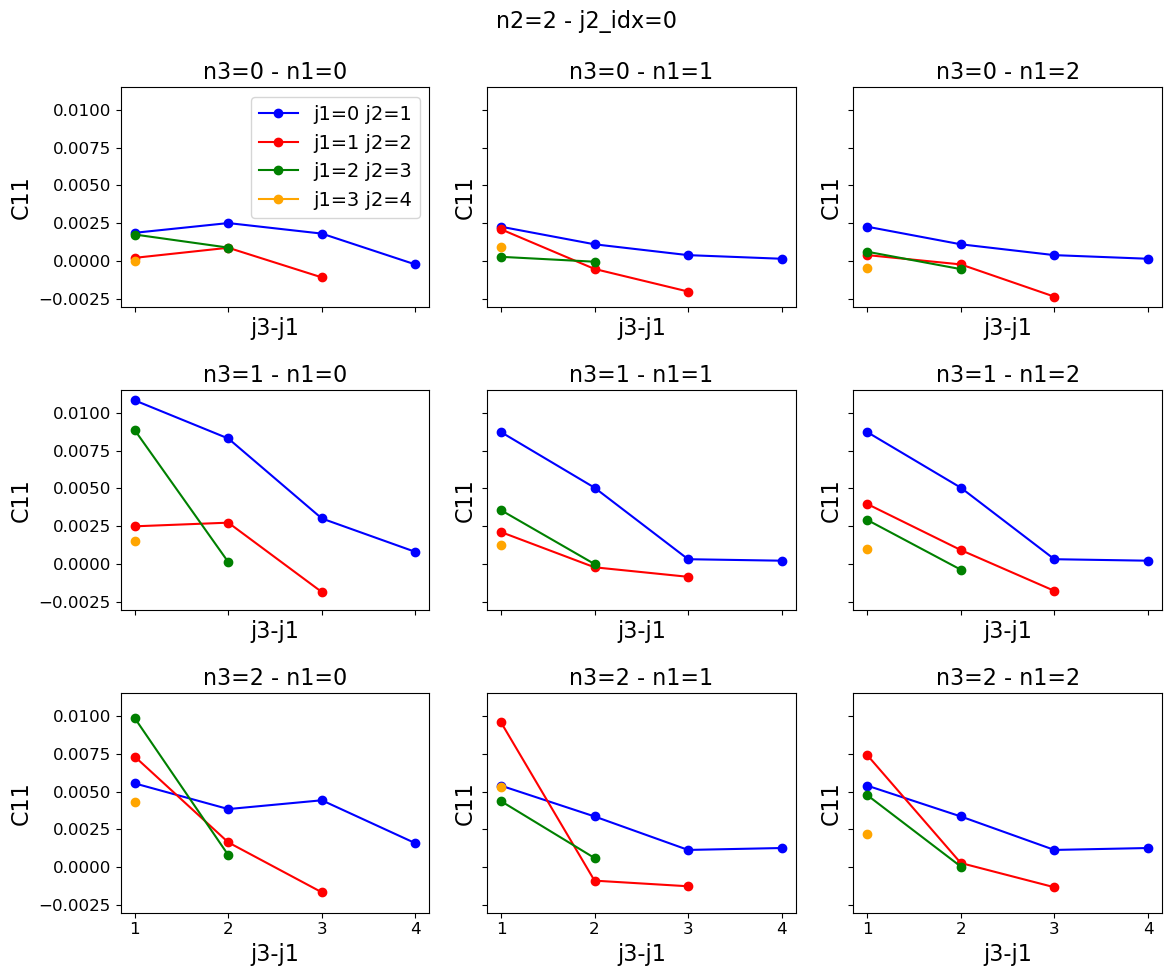

In [122]:
print(C11)

# Check on white noise

1 [2 3 4] 2
2 [3 4] 3
3 [4] 4


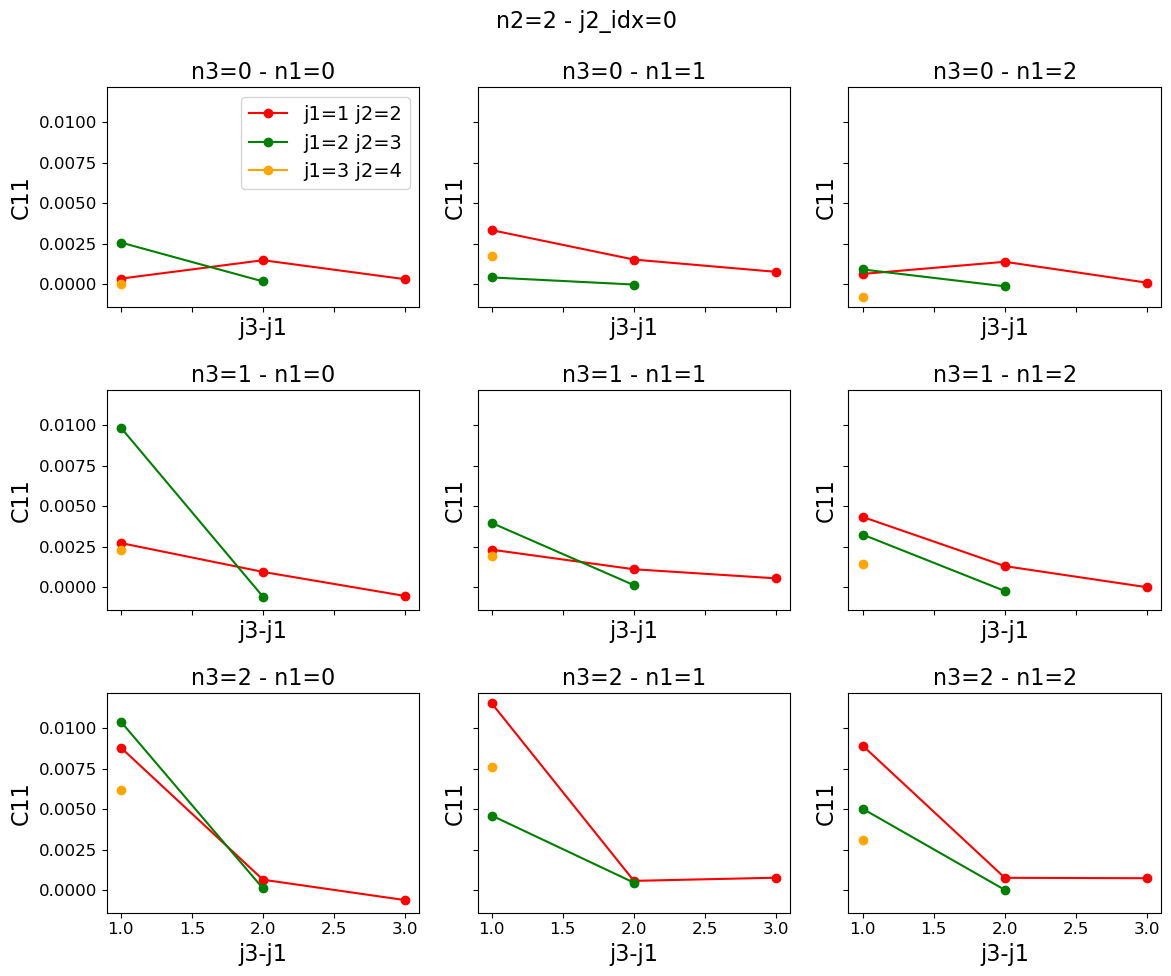

In [33]:
# Check that C01 is compatible with 0 for white noise
nreals = 30
S1_all, P00_all, C01_all, C11_all = [], [], [], []
for i in range(nreals):
    print('real:', i)
    I = np.random.randn(L, 2 * L - 1).astype(np.float64) + 1j*np.random.randn(L, 2 * L - 1).astype(np.float64)
    Ilm = s2fft.forward_jax(I, L, sampling=sampling, nside=nside)

    mean, var, S1, P00, C01, C11 = scatlib.scat_cov_dir(
        Ilm, L, N, J_min, sampling, nside, reality, multiresolution, filters=filters)

    print(C01)
    print(C11)
    S1_all.append(S1)
    P00_all.append(P00)
    C01_all.append(C01)
    C11_all.append(C11)

S1_all = np.array(S1_all)
P00_all = np.array(P00_all)
C01_all = np.array(C01_all)
C11_all = np.array(C11_all)

In [124]:
# Normalize by the STD over realisations
stdS1 = np.std(S1_all, axis=0)
stdP00 = np.std(P00_all, axis=0)
stdC01 = np.std(C01_all, axis=0)
stdC11 = np.std(C11_all, axis=0)

avgS1 = np.mean(S1_all, axis=0)
avgP00 = np.mean(P00_all, axis=0)
avgC01 = np.mean(C01_all, axis=0)
avgC11 = np.mean(C11_all, axis=0)

TypeError: loop of ufunc does not support argument 0 of type Array which has no callable sqrt method

In [125]:
stdC11.shape


NameError: name 'stdC11' is not defined

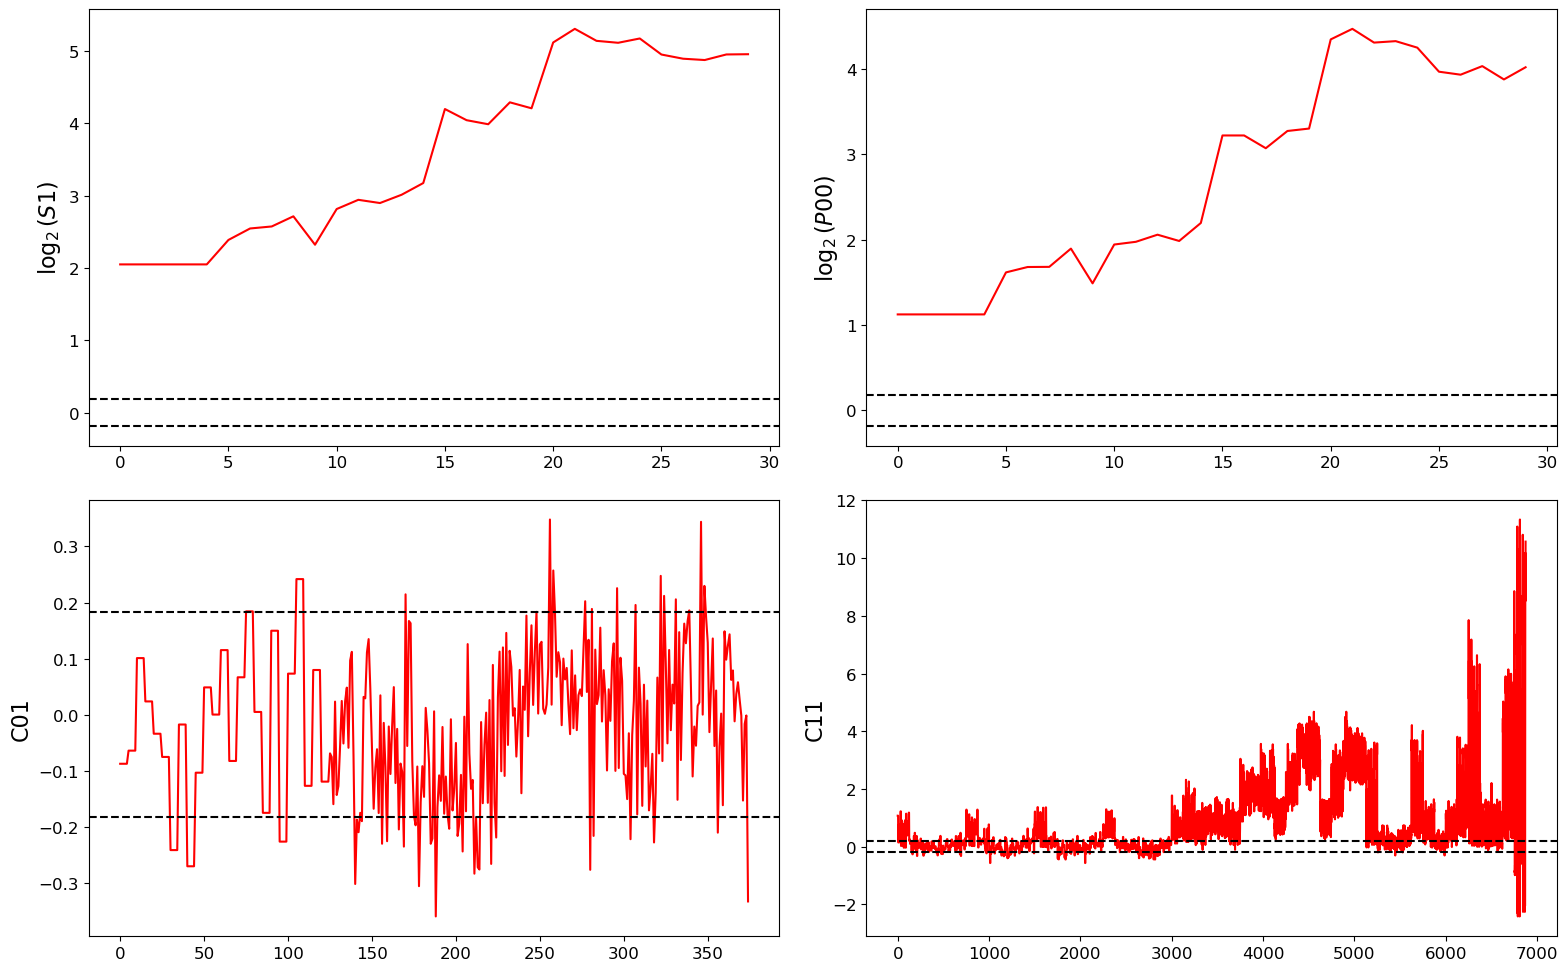

In [15]:
def forplot(ax):
    # ax.legend(fontsize=16)
    ax.axhline(-1/np.sqrt(nreals), color='k', ls='--')
    ax.axhline(1/np.sqrt(nreals), color='k', ls='--')
    return

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].plot(np.log2(avgS1 / stdS1), 'r')
axs[0].set_ylabel(r'$\log_2(S1)$', fontsize=16)
#forplot(axs[0])

axs[1].plot(np.log2(avgP00 / stdP00), 'r')
axs[1].set_ylabel(r'$\log_2(P00)$', fontsize=16)
#forplot(axs[1])

axs[2].plot(avgC01/stdC01, 'r')
axs[2].set_ylabel('C01', fontsize=16)
forplot(axs[2])
# axs[2].set_yscale('log')

axs[3].plot(avgC11/stdC11, 'r')
axs[3].set_ylabel('C11', fontsize=16)
forplot(axs[3])
# axs[3].set_yscale('log')

fig.tight_layout()

In [144]:
print(C11[:])

[-9.15744707e-05+8.83892392e-21j -9.15744707e-05+8.83892392e-21j
 -9.15744707e-05+8.83892392e-21j ...  1.46944530e-04-4.27005649e-13j
  2.08786748e-03+1.39721531e-11j -5.98486284e-05-7.50424319e-12j]
